# K-means: California housing

In [3]:
# Handle imports up-front
import pandas as pd

## 1. Data loading
### 1.1. Load

In [4]:
raw_data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

### 1.2. Inspect

In [5]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 1.3. Remove unnecessary features

In [6]:
data_df=raw_data_df[['MedInc', 'Latitude', 'Longitude']]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


### 1.4. Test-train split

In [7]:
# Your code here...

## 2. EDA
### 2.1. Missing, and/or extreme values

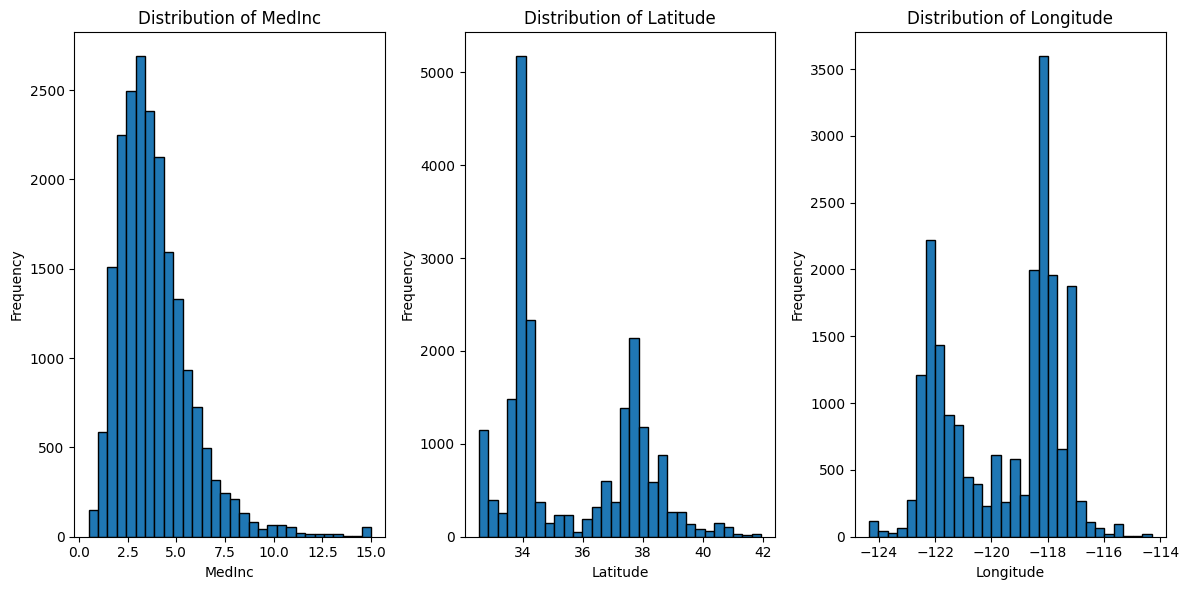

In [ ]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Perform train/test split
train_data, test_data = train_test_split(data_df, test_size=0.2, random_state=42)

plt.figure(figsize=(12, 6))

for i, column in enumerate(data_df.columns, 1):
    plt.subplot(1, 3, i)
    plt.hist(data_df[column], bins=30, edgecolor='k')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 2.2. Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
scaled_train_data = scaler.fit_transform(train_data)

# Apply the same transformation to the test data
scaled_test_data = scaler.transform(test_data)

# Convert scaled data back to a DataFrame for easier interpretation (optional)
scaled_train_df = pd.DataFrame(scaled_train_data, columns=data_df.columns)
scaled_test_df = pd.DataFrame(scaled_test_data, columns=data_df.columns)


## 3. Clustering

### 3.1. Find clusters

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the number of clusters (you can adjust this)
k = 3  # Initial guess for number of clusters

# Initialize and fit K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_train_data)

# Predict clusters for training and test data
train_data['Cluster'] = kmeans.labels_
test_data['Cluster'] = kmeans.predict(scaled_test_data)


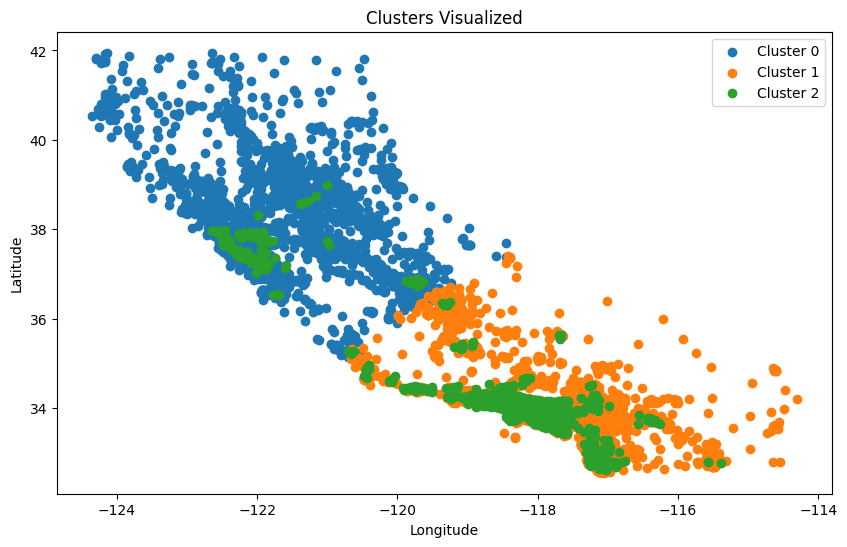

In [20]:
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster in range(k):
    cluster_data = train_data[train_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')

plt.title('Clusters Visualized')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


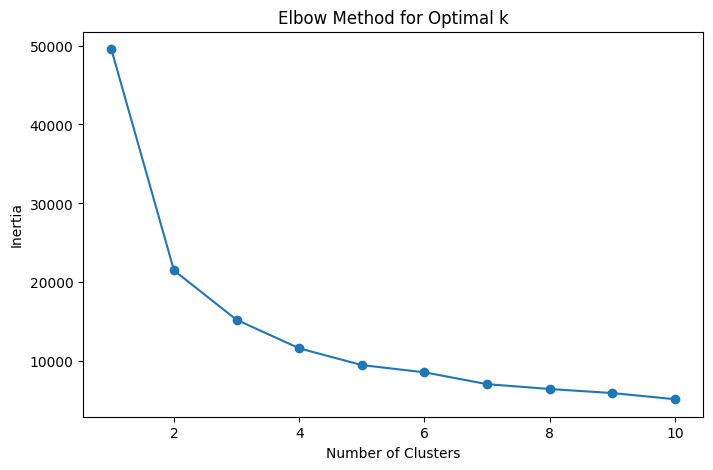

In [ ]:

inertia = []
k_range = range(1, 11)  # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_train_data)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


### 3.2. Add cluster label to training data

In [22]:
# Add clusters to the original dataset as a new label
raw_data_df['Cluster'] = kmeans.predict(scaler.transform(data_df))

# Inspect the dataset with clusters
print(raw_data_df.head())

# Check the distribution of data points across clusters
cluster_counts = raw_data_df['Cluster'].value_counts()
print("\nData points per cluster:")
print(cluster_counts)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  Cluster  
0    -122.23        4.526        5  
1    -122.22        3.585        5  
2    -122.24        3.521        5  
3    -122.25        3.413        0  
4    -122.25        3.422        0  

Data points per cluster:
Cluster
1    4143
3    3867
4    3161
0    2978
2    1540
7    1529
8    1453
5     923
6     771
9     275
Name: count, dtype: int64


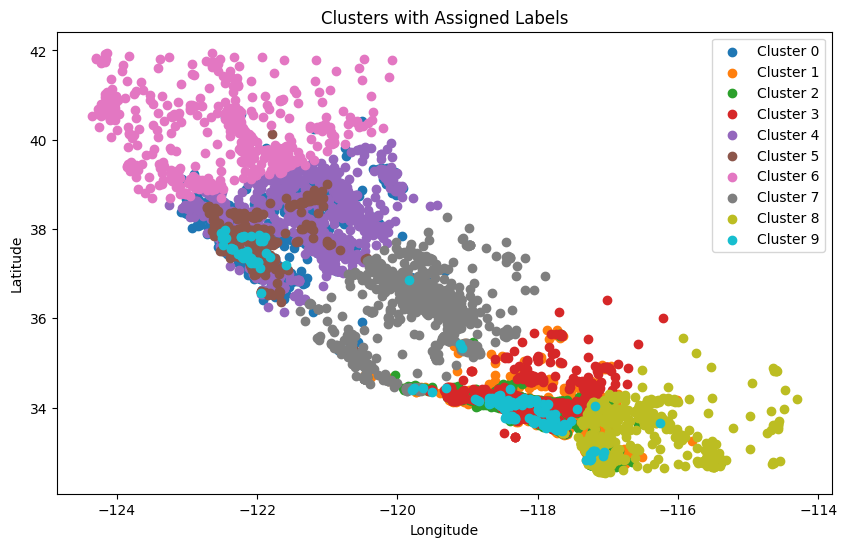

In [23]:
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster in range(k):
    cluster_data = raw_data_df[raw_data_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')

plt.title('Clusters with Assigned Labels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


### 3.3. Plot results

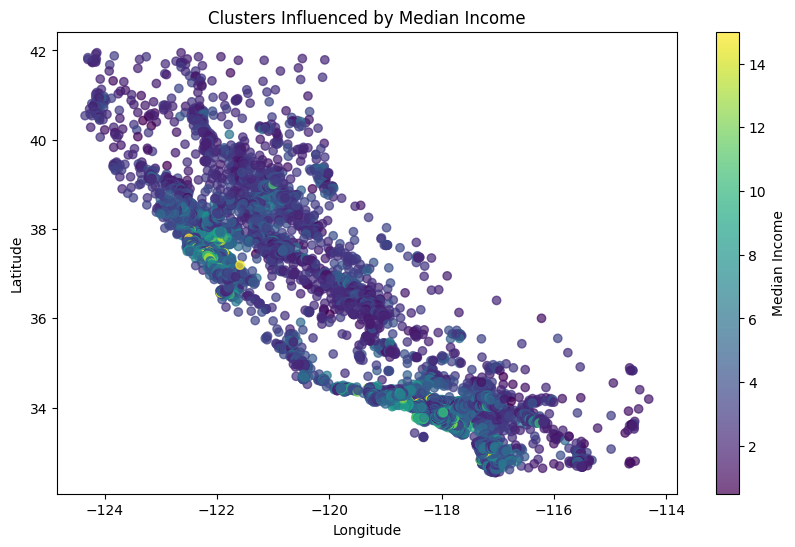

In [24]:
plt.figure(figsize=(10, 6))

# Scatter plot with Median Income as color gradient
scatter = plt.scatter(
    raw_data_df['Longitude'],
    raw_data_df['Latitude'],
    c=raw_data_df['MedInc'],
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(scatter, label='Median Income')
plt.title('Clusters Influenced by Median Income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


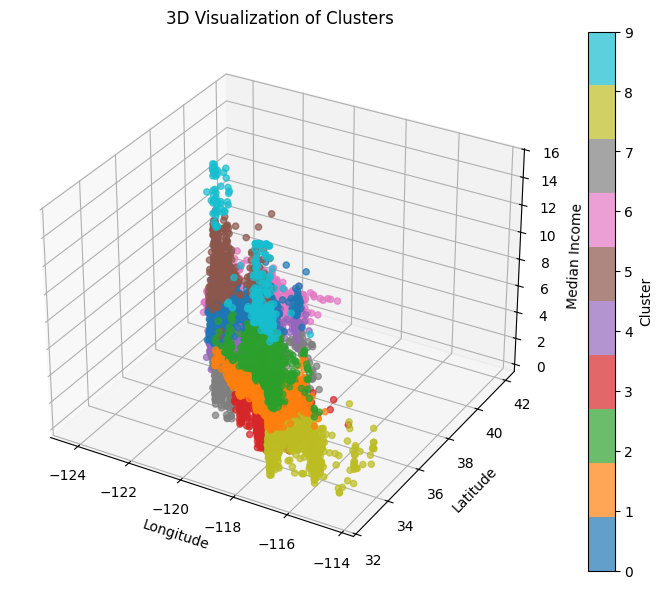

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(
    raw_data_df['Longitude'],
    raw_data_df['Latitude'],
    raw_data_df['MedInc'],
    c=raw_data_df['Cluster'],
    cmap='tab10',
    alpha=0.7
)

ax.set_title('3D Visualization of Clusters')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median Income')
plt.colorbar(scatter, label='Cluster')
plt.show()


## 4. Supervised classification model
### 4.1. Features & labels

In [26]:
from sklearn.model_selection import train_test_split

# Features (X) and Labels (y)
X = raw_data_df[['MedInc', 'Latitude', 'Longitude']]
y = raw_data_df['Cluster']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for training the classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shape of the datasets
print(f"Training features shape: {X_train_scaled.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test features shape: {X_test_scaled.shape}")
print(f"Test labels shape: {y_test.shape}")


Training features shape: (16512, 3)
Training labels shape: (16512,)
Test features shape: (4128, 3)
Test labels shape: (4128,)


### 4.2. Model training

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       568
           1       0.99      0.99      0.99       854
           2       1.00      1.00      1.00       291
           3       1.00      1.00      1.00       799
           4       0.99      1.00      0.99       631
           5       0.99      1.00      0.99       164
           6       1.00      0.99      0.99       151
           7       1.00      0.98      0.99       306
           8       0.98      0.97      0.98       303
           9       1.00      1.00      1.00        61

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



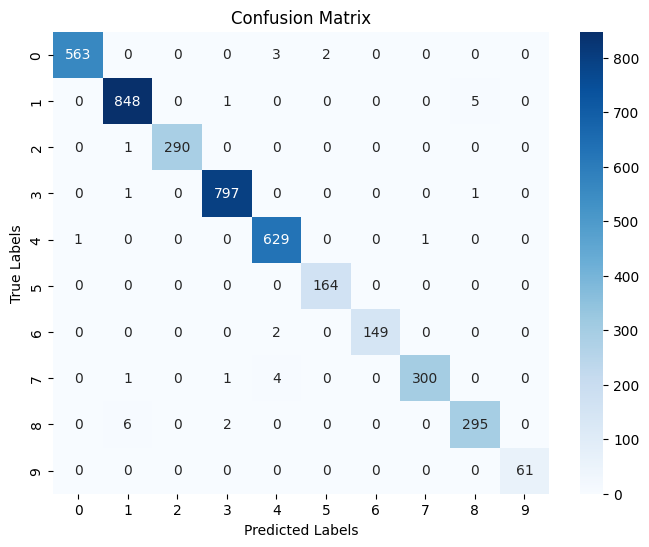

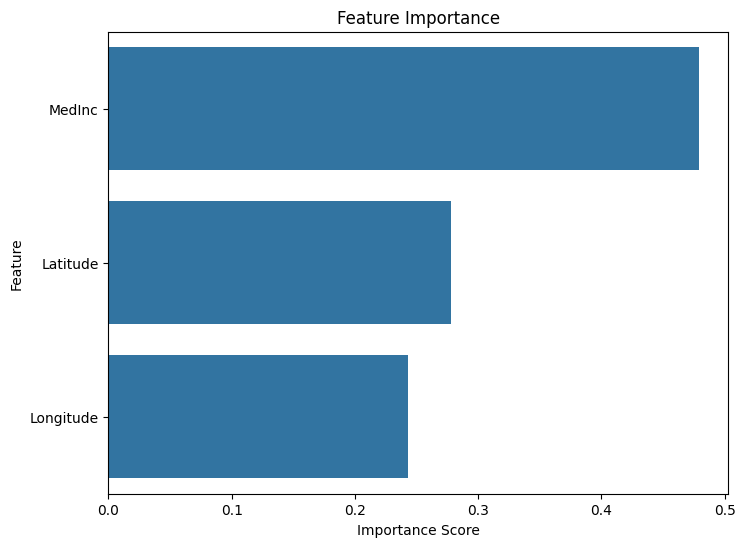

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Feature Importance
plt.figure(figsize=(8, 6))
feature_importance = rf_classifier.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.2f}")

# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred_tuned = best_rf.predict(X_test_scaled)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Test Set Accuracy After Tuning: {accuracy_tuned:.2f}")

# Display the classification report
print("Classification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END max_d

### 4.3. Cross-validation

In [29]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier with best parameters from tuning
rf_classifier_cv = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


Cross-Validation Scores: [0.98910082 0.99212837 0.99000606 0.99212598 0.98909752]
Mean Accuracy: 0.99
Standard Deviation: 0.00


### 4.4. Model evaluation

Test Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       568
           1       0.99      0.99      0.99       854
           2       1.00      1.00      1.00       291
           3       1.00      1.00      1.00       799
           4       0.98      1.00      0.99       631
           5       0.99      1.00      0.99       164
           6       1.00      0.97      0.99       151
           7       1.00      0.98      0.99       306
           8       0.98      0.98      0.98       303
           9       1.00      1.00      1.00        61

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



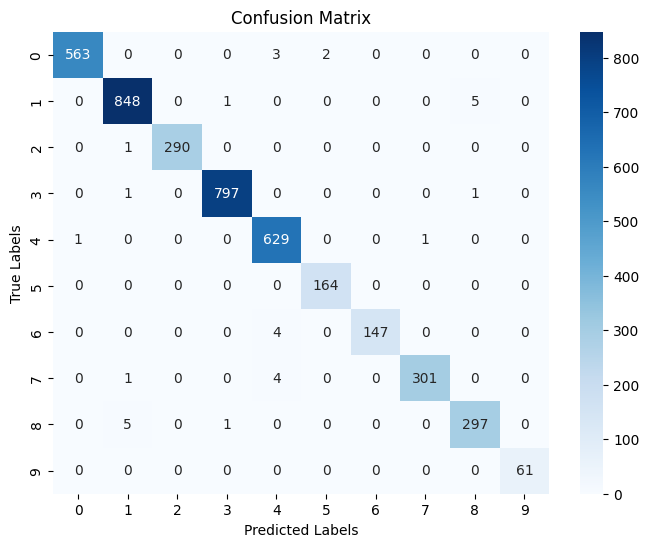

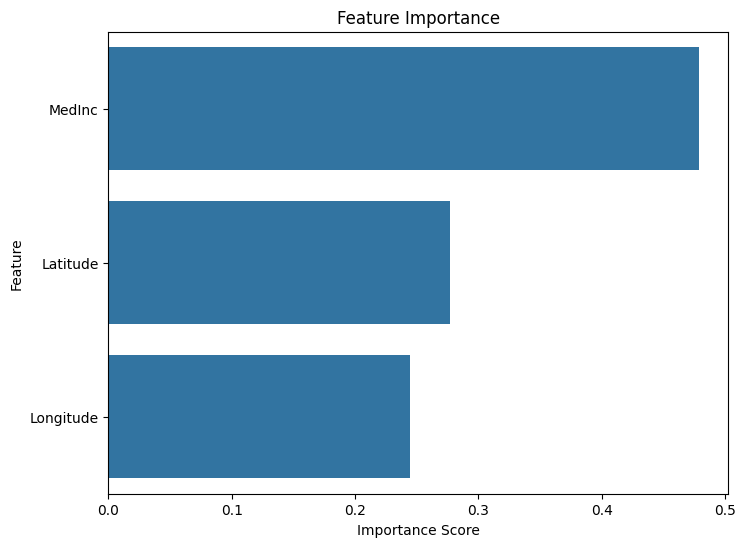

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set using the best model
y_test_pred = best_rf.predict(X_test_scaled)

# Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Feature Importance
plt.figure(figsize=(8, 6))
feature_importance = best_rf.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Probably the best full model optimization I've ever completed.